In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [64]:
i = 20
for i, x in enumerate(x_test):
    cv2.imshow("Zahl",x)
    key = cv2.waitKey(100)
    if key == 27:
        break
cv2.destroyAllWindows()
#plt.imshow(x_test[i])
#print(y_test[i])

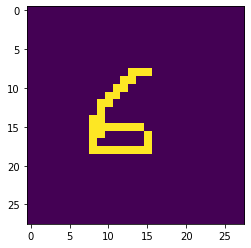

In [56]:
img = cv2.imread("test_7.png",0) / 255.0
plt.imshow(img)

In [57]:
guess = probability_model(np.array([img]))
print(f"It's a {np.argmax(guess) + 1} with the certainty or {np.max(guess)}")

It's a 5 with the certainty or 0.9018933176994324


In [28]:
len(x_train[:1][0][0])

28

In [41]:
x_train[:1].shape

(1, 28, 28)

In [44]:
np.array([img]).shape

(1, 28, 28)

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4710 - accuracy: 0.8627
Epoch 2/5
1875/1875 [==============================] - 2s 972us/step - loss: 0.1548 - accuracy: 0.9538
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1077 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0880 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0777 - accuracy: 0.9768


In [11]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0718 - accuracy: 0.9787


[0.07177675515413284, 0.9786999821662903]

In [12]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
